In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [51]:
print(f"La dimension de la dataset est {df.shape} soit {df.shape[1]} colonnes et {df.shape[0]} lignes")

La dimension de la dataset est (100000, 9) soit 9 colonnes et 100000 lignes


In [52]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [54]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [55]:
# tranform gender => Categorical data
gender_bool = {"Female": 1, "Male": 0}
df.gender = df.gender.map(gender_bool)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [56]:
# transform smoking_history => categorical data
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [57]:
is_smoking = {
    "never": 1, 
    "No Info": 2, 
    "current": 3, 
    "former": 4, 
    "ever": 5, 
    "not current": 6
}
df["smoking_history"] = df["smoking_history"].map(is_smoking)
df["smoking_history"]

0        1
1        2
2        1
3        3
4        3
        ..
99995    2
99996    2
99997    4
99998    1
99999    3
Name: smoking_history, Length: 100000, dtype: int64

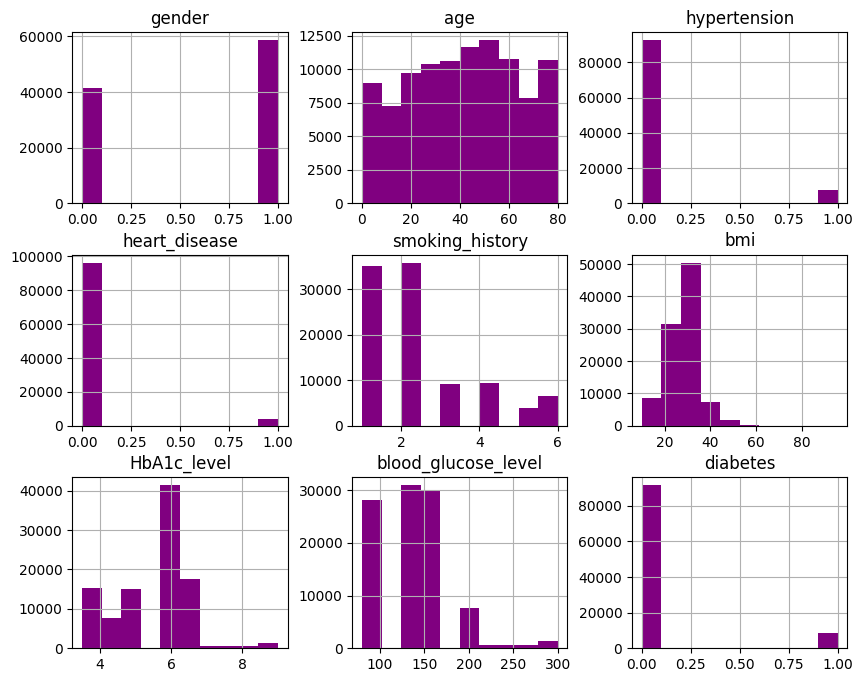

In [58]:
df.hist(bins = 10,figsize=(10, 8), color="purple")
plt.show()

In [59]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [60]:
# get missing value 
for element in df.columns:
    print(f"Missing value dans la colonne {element} est de {df[element].isna().sum()}")

Missing value dans la colonne gender est de 18
Missing value dans la colonne age est de 0
Missing value dans la colonne hypertension est de 0
Missing value dans la colonne heart_disease est de 0
Missing value dans la colonne smoking_history est de 0
Missing value dans la colonne bmi est de 0
Missing value dans la colonne HbA1c_level est de 0
Missing value dans la colonne blood_glucose_level est de 0
Missing value dans la colonne diabetes est de 0


In [61]:
# replace missing value to median
gender_missing = df['gender'].median()
df['gender'].fillna(gender_missing, inplace=True)

In [62]:
print(f"Missing value on gender column : {df['gender'].isnull().sum()}")

Missing value on gender column : 0


In [63]:
correlation = df.corr()
correlation

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030282,-0.014423,-0.077911,-0.053638,0.023021,-0.020058,-0.017189,-0.037666
age,0.030282,1.000000,0.251171,0.233354,0.143647,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014423,0.251171,1.000000,0.121262,0.031913,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077911,0.233354,0.121262,1.000000,0.071547,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.053638,0.143647,0.031913,0.071547,1.000000,0.068321,0.023195,0.023031,0.057908
bmi,0.023021,0.337396,0.147666,0.061198,0.068321,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.020058,0.101354,0.080939,0.067589,0.023195,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017189,0.110672,0.084429,0.070066,0.023031,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037666,0.258008,0.197823,0.171727,0.057908,0.214357,0.400660,0.419558,1.000000


<Axes: >

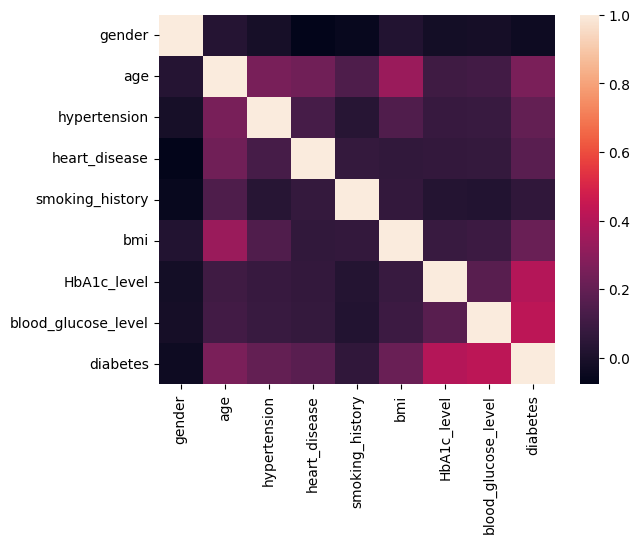

In [64]:
sns.heatmap(correlation)

In [65]:
features = [
    'gender', 
    'age', 
    'hypertension', 
    'heart_disease', 
    'smoking_history',
    'bmi', 
    'HbA1c_level', 
    'blood_glucose_level'
]

In [66]:
# x => label
X = df[features]

In [67]:
# y => target 
y = df["diabetes"]

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
model = RandomForestClassifier(random_state=1)

In [71]:
rf_model = model.fit(X_train, y_train)

In [72]:
prediction = model.predict(X_test)

In [73]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
# analysing metrics of the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [83]:
precision = precision_score(y_test, prediction)
accuracy = accuracy_score(y_test, prediction)
confusion = confusion_matrix(y_test, prediction)

In [84]:
print(f"Model accuracy : {accuracy*100}%")
print(f"Model precision : {precision * 100}%")
print(f"Model confusion : {confusion}")

Model accuracy : 97.112%
Model precision : 95.94855305466238%
Model confusion : [[22786    63]
 [  659  1492]]


[Text(0.5, 1.0, 'Confusion matrix')]

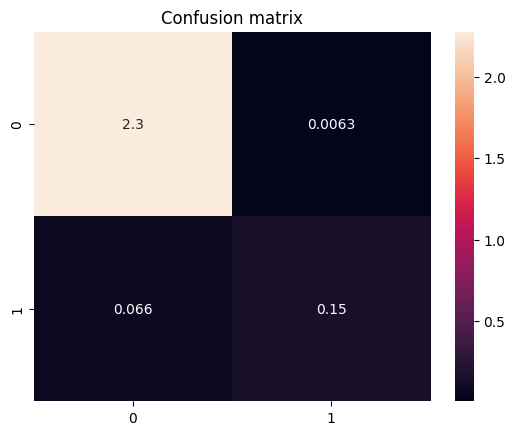

In [100]:
sns.heatmap((confusion/10000), annot=True).set(title="Confusion matrix")